1.  <a href="#intro">Dataset Description</a>
2.  <a href="#asses">Data Assessing</a>
    - <a href="#emp">Employee.csv</a>
    - <a href="#edu">EducationLevel.csv</a>
    - <a href="#perform">PerformanceRating.csv</a>
    - <a href="#satis">SatisfiedLevel.csv</a>
    - <a href="#rating">RatingLevel.csv</a>
3.  <a href="#clean">Data Cleaning</a>
    - <a href="#c_emp">Employee.csv</a>
    - <a href="#c_edu">EducationLevel.csv</a>
    - <a href="#c_perform">PerformanceRating.csv</a>
    - <a href="#c_satis">SatisfiedLevel.csv</a>
    - <a href="#c_rating">RatingLevel.csv</a>

<a id='intro'></a>
### Dataset Description:

## Dataset Introduction
This dataset is designed to provide comprehensive insights into employee performance and satisfaction within the organization. It consists of five interrelated tables, each serving a specific purpose in analyzing various aspects of employee experience and performance metrics.

#### 1. Employee Table ( _Employee.csv_):

This foundational table contains detailed information about each employee, including personal attributes such as name, gender, and salary, as well as professional details like position and educational level. This information is critical for understanding the demographic and professional context of the workforce.

#### 2. Educational Level Table (_EducationLevel.csv_): 
This table categorizes employee educational backgrounds into five distinct levels, ranging from "No Formal Qualifications" to "Doctorate." It serves as a reference for interpreting the education level recorded in the Employee table, facilitating analysis of how educational attainment correlates with performance and satisfaction.

#### 3. Performance Rating Table (_PerformanceRating.csv_): 
This table captures performance evaluations across several dimensions, including Environment Satisfaction, Job Satisfaction, Relationship Satisfaction, Work-Life Balance, Self Rating, and Manager Rating. Each of these metrics is rated on a scale of 1 to 5, enabling a quantitative assessment of employee performance and satisfaction.

#### 4. Satisfied Level Table (_SatisfiedLevel.csv_): 
This table categorizes employee satisfaction into five distinct levels, ranging from "Very Dissatisfied" to "Very Satisfied." It serves as a reference for interpreting the satisfaction ratings recorded in the Performance Rating table.

#### 5. Rating Table (_RatingLevel.csv_): 
Similar to the Satisfied Level Table, this table provides definitions for performance ratings, ranging from "Unacceptable" to "Above and Beyond." This allows for a standardized assessment of employee performance based on managerial evaluations.

#### ***Integration:***
By linking the Performance Rating table with the Satisfied Level and Rating tables, this dataset enables a nuanced analysis of how employee perceptions of their work environment and self-assessments align with managerial evaluations.

##### _Overall, this dataset is a valuable resource for understanding employee dynamics, assessing satisfaction levels, and identifying areas for improvement within the organization. Through careful analysis, it can inform strategies aimed at enhancing employee engagement, productivity, and overall workplace satisfaction._

In [338]:
# Importing Liberaries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc
from sqlalchemy import create_engine


<a id='asses'></a>
## Data Assessing:
### _General Properties:_

<a id='emp'></a>
#### ***1. Employee Table:***

In [341]:
# Load the Employee Dataset:
df_emp= pd.read_csv("HR/Employee.csv")
df_emp.head()

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,Divorced,102059,1,No,2012-01-03,No,10,4,9,7
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,CA,White,...,Single,157718,0,Yes,2012-01-04,No,10,6,10,0
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,CA,Asian or Asian American,...,Married,309964,1,No,2012-01-04,No,10,6,10,8
3,47A0-559B,Ermentrude,Berrie,Non-Binary,39,Some Travel,Technology,12,IL,White,...,Married,293132,0,No,2012-01-05,No,10,10,10,0
4,42CC-040A,Stace,Savege,Female,29,Some Travel,Human Resources,29,CA,White,...,Single,49606,0,No,2012-01-05,Yes,6,1,1,6


In [342]:
df_emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmployeeID               1470 non-null   object
 1   FirstName                1470 non-null   object
 2   LastName                 1470 non-null   object
 3   Gender                   1470 non-null   object
 4   Age                      1470 non-null   int64 
 5   BusinessTravel           1470 non-null   object
 6   Department               1470 non-null   object
 7   DistanceFromHome (KM)    1470 non-null   int64 
 8   State                    1470 non-null   object
 9   Ethnicity                1470 non-null   object
 10  Education                1470 non-null   int64 
 11  EducationField           1470 non-null   object
 12  JobRole                  1470 non-null   object
 13  MaritalStatus            1470 non-null   object
 14  Salary                   1470 non-null  

In [343]:
print('The table has a shape of:',df_emp.shape)

The table has a shape of: (1470, 23)


In [344]:
if df_emp.isna().sum().sum()== 0:
    print ('No NULL values in this table')
else:
    print('Total number of Null Values is: ',df_emp.isna().sum().sum())

No NULL values in this table


In [345]:
if df_emp.duplicated().sum()== 0:
    print ('No DUPLICATED values in this table')
else:
    print('Total number of Duplicated Values is: ',df_emp.duplicated().sum())

No DUPLICATED values in this table


In [346]:
print('The number of UNIQUE values in this table:\n\n',df_emp.nunique())

The number of UNIQUE values in this table:

 EmployeeID                 1470
FirstName                  1334
LastName                   1441
Gender                        4
Age                          34
BusinessTravel                3
Department                    3
DistanceFromHome (KM)        45
State                         3
Ethnicity                     7
Education                     5
EducationField                9
JobRole                      13
MaritalStatus                 3
Salary                     1455
StockOptionLevel              4
OverTime                      2
HireDate                   1192
Attrition                     2
YearsAtCompany               11
YearsInMostRecentRole        11
YearsSinceLastPromotion      11
YearsWithCurrManager         11
dtype: int64


In [347]:
print('"Gender" Categories:\n',df_emp.Gender.unique())
print('\n"BusinessTravel" Categories:\n',df_emp.BusinessTravel.unique())
print('\n"Department" Categories:\n',df_emp.Department.unique())
print('\n"State" Categories:\n',df_emp.State.unique())
print('\n"Ethnicity" Categories:\n',df_emp.Ethnicity.unique())
print('\n"Education" Categories:\n',sorted(df_emp.Education.unique()))
print('\n"EducationField" Categories:\n',df_emp.EducationField.unique())
print('\n"JobRole" Categories:\n',df_emp.JobRole.unique())
print('\n"MaritalStatus" Categories:\n',df_emp.MaritalStatus.unique())
print('\n"StockOptionLevel" Categories:\n',sorted(df_emp.StockOptionLevel.unique()))
print('\n"OverTime" Categories:\n',df_emp.OverTime.unique())
print('\n"Attrition" Categories:\n',df_emp.Attrition.unique())

"Gender" Categories:
 ['Female' 'Male' 'Non-Binary' 'Prefer Not To Say']

"BusinessTravel" Categories:
 ['Some Travel' 'No Travel ' 'Frequent Traveller']

"Department" Categories:
 ['Sales' 'Human Resources' 'Technology']

"State" Categories:
 ['IL' 'CA' 'NY']

"Ethnicity" Categories:
 ['White' 'Asian or Asian American' 'Mixed or multiple ethnic groups'
 'Black or African American' 'Native Hawaiian ' 'Other '
 'American Indian or Alaska Native']

"Education" Categories:
 [1, 2, 3, 4, 5]

"EducationField" Categories:
 ['Marketing' 'Marketing ' 'Computer Science' 'Technical Degree'
 'Information Systems' 'Other' 'Economics' 'Human Resources'
 'Business Studies']

"JobRole" Categories:
 ['Sales Executive' 'HR Business Partner' 'Engineering Manager' 'Recruiter'
 'Data Scientist' 'Machine Learning Engineer' 'Manager'
 'Software Engineer' 'Senior Software Engineer' 'Sales Representative'
 'Analytics Manager' 'HR Executive' 'HR Manager']

"MaritalStatus" Categories:
 ['Divorced' 'Single' 'Mar

In [348]:
print(f'Employee Ages are ranging from {df_emp.Age.min()} to {df_emp.Age.max()} Years')

Employee Ages are ranging from 18 to 51 Years


In [349]:
print('Home-Work Distance is ranging from {} to {} KM'.format(df_emp['DistanceFromHome (KM)'].min(),df_emp['DistanceFromHome (KM)'].max()))

Home-Work Distance is ranging from 1 to 45 KM


In [350]:
print(f'Salary is in the range of {df_emp.Salary.min()} to {df_emp.Salary.max()} USD/Year')

Salary is in the range of 20387 to 547204 USD/Year


In [351]:
print(f'The recorded Employee Hiring dates are starting from {df_emp.HireDate.min()} to {df_emp.HireDate.max()}')

The recorded Employee Hiring dates are starting from 2012-01-03 to 2022-12-31


In [352]:
if df_emp.YearsAtCompany.min()== 0:
    print(f'The Working Period of each employee is ranging from less than a year to {df_emp.YearsAtCompany.max()} Years')
else:
    print(f'The Working Period of each employee is ranging from {df_emp.YearsAtCompany.min()} to {df_emp.YearsAtCompany.max()} Years')

The Working Period of each employee is ranging from less than a year to 10 Years


In [353]:
if df_emp.YearsInMostRecentRole.min()== 0:
    print(f'The Time Spent in the current position for each employee is ranging from less than a year to {df_emp.YearsInMostRecentRole.max()} Years')
else:
    print(f'The Time Spent in the current position for each employee is ranging from {df_emp.YearsInMostRecentRole.min()} to {df_emp.YearsInMostRecentRole.max()} Years')

The Time Spent in the current position for each employee is ranging from less than a year to 10 Years


In [354]:
if df_emp.YearsSinceLastPromotion.min()== 0:
    print(f'The Promotion Gap for each employee is ranging from less than a year to {df_emp.YearsSinceLastPromotion.max()} Years')
else:
    print(f'The Promotion Gap for each employee is ranging from {df_emp.YearsSinceLastPromotion.min()} to {df_emp.YearsSinceLastPromotion.max()} Years')

The Promotion Gap for each employee is ranging from less than a year to 10 Years


In [355]:
if df_emp.YearsWithCurrManager.min()== 0:
    print(f'The Working Period of each employee under the current manager is ranging from less than a year to {df_emp.YearsWithCurrManager.max()} Years')
else:
    print(f'The Working Period of each employee under the current manager is ranging from {df_emp.YearsWithCurrManager.min()} to {df_emp.YearsWithCurrManager.max()} Years')

The Working Period of each employee under the current manager is ranging from less than a year to 10 Years


In [448]:
# Employee Table Description:
summary_stat= df_emp.iloc[:,[4,7,14,19,20,21,22]].describe().astype('int64').reset_index().\
                rename(columns={'index':'Stat','DistanceFromHome (KM)': 'Comute_Distance',
                                 'YearsAtCompany':'Tenure','YearsInMostRecentRole': 'Role_Tenure',
                                  'YearsSinceLastPromotion': 'Promotion_Gap',
                                   'YearsWithCurrManager':'Curr_Mgr_Tenure'})

summary_stat

,Stat,Age,Comute_Distance,Salary,Tenure,Role_Tenure,Promotion_Gap,Curr_Mgr_Tenure
0,count,1470,1470,1470,1470,1470,1470,1470
1,mean,28,22,112956,4,2,3,2
2,std,7,12,103342,3,2,2,2
3,min,18,1,20387,0,0,0,0
4,25%,23,12,43580,2,0,1,0
5,50%,26,22,71199,4,1,3,1
6,75%,34,33,142055,7,4,6,4
7,max,51,45,547204,10,10,10,10


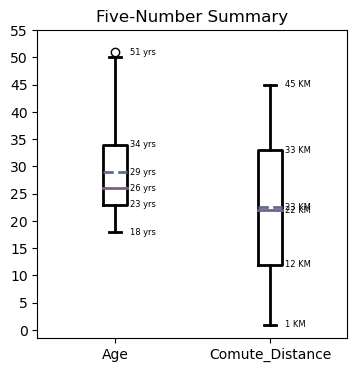

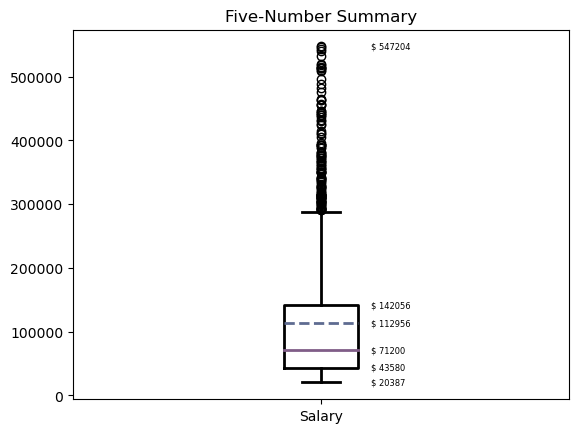

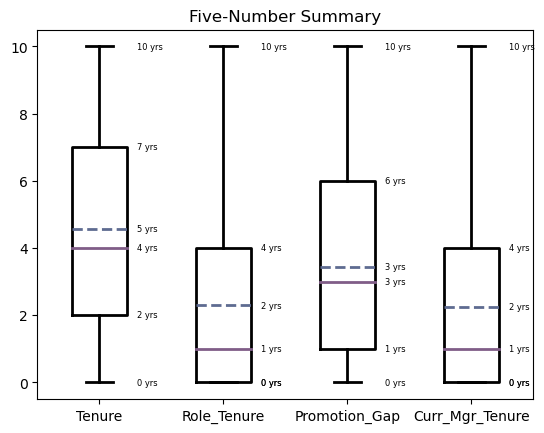

In [357]:
# Visualizing those 7 Columns to check for outliers and any possible inconsistency:
plt.subplots(figsize = (4,4))

# Age & Home-Work Distance (their values are close to each other)
plt.boxplot(df_emp.iloc[:,[4,7]],showmeans = True, meanline  = True,showcaps = True,medianprops={ "color" : "#805d87","linewidth": 2},
            boxprops={"color":"black","linewidth": 2},whiskerprops={"color": "black", "linewidth": 2},
            capprops={"color": "black", "linewidth": 2},meanprops = {"color": "#5e6b91","linewidth": 2 })
for i, v in enumerate(summary_stat.iloc[[1,3,4,5,6,7],1]):
  plt.text(1.1,v,f'{v:.0f} yrs', ha='left', va='center',fontsize=6)
for i, v in enumerate(summary_stat.iloc[[1,3,4,5,6,7],2]):
  plt.text(2.1,v,f'{v:.0f} KM', ha='left', va='center',fontsize=6)
plt.title('Five-Number Summary', fontsize = 12)
plt.xticks([1,2],['Age','Comute_Distance'], fontsize = 10)
plt.yticks(np.arange(0,60,5),fontsize = 10)
plt.show();

# Salary:
plt.boxplot(df_emp.Salary,showmeans = True, meanline  = True,showcaps = True,medianprops={ "color" : "#805d87","linewidth": 2},
            boxprops={"color":"black","linewidth": 2},whiskerprops={"color": "black", "linewidth": 2},
            capprops={"color": "black", "linewidth": 2},meanprops = {"color": "#5e6b91","linewidth": 2 })
for i, v in enumerate(summary_stat.iloc[[1,3,4,5,6,7],3]):
  plt.text(1.1,v,f'$ {v:.0f}', ha='left', va='center',fontsize=6)  
plt.title('Five-Number Summary', fontsize = 12)
plt.xticks([1],['Salary'], fontsize = 10)
plt.yticks(fontsize = 10)
plt.show();

# YearsAtCompany, YearsInMostRecentRole, YearsSinceLastPromotion, YearsWithCurrManager:
plt.boxplot(df_emp.iloc[:,[19,20,21,22]],showmeans = True, meanline  = True,showcaps = True,medianprops={ "color" : "#805d87","linewidth": 2},
            boxprops={"color":"black","linewidth": 2},whiskerprops={"color": "black", "linewidth": 2},
            capprops={"color": "black", "linewidth": 2},meanprops = {"color": "#5e6b91","linewidth": 2 })
for i, v in enumerate(summary_stat.iloc[[1,3,4,5,6,7],4]):
  plt.text(1.3,v,f'{v:.0f} yrs', ha='left', va='center',fontsize=6) 
for i, v in enumerate(summary_stat.iloc[[1,3,4,5,6,7],5]):
  plt.text(2.3,v,f'{v:.0f} yrs', ha='left', va='center',fontsize=6) 
for i, v in enumerate(summary_stat.iloc[[1,3,4,5,6,7],6]):
  plt.text(3.3,v,f'{v:.0f} yrs', ha='left', va='center',fontsize=6)
for i, v in enumerate(summary_stat.iloc[[1,3,4,5,6,7],7]):
  plt.text(4.3,v,f'{v:.0f} yrs', ha='left', va='center',fontsize=6) 
plt.title('Five-Number Summary', fontsize = 12)
plt.xticks([1,2,3,4],['Tenure','Role_Tenure','Promotion_Gap','Curr_Mgr_Tenure'], fontsize = 10)
plt.yticks(fontsize = 10)
plt.show();

In [358]:
# Count of Employees according to Gender Clasification:
df_emp.groupby('Gender').EmployeeID.nunique().reset_index().rename(columns={'EmployeeID':'Employee_count'}).\
sort_values('Employee_count',ascending=False).style.hide()

Gender,Employee_count
Female,675
Male,651
Non-Binary,124
Prefer Not To Say,20


In [359]:
# Count of Employees according to BusinessTravel Clasification:
df_emp.groupby('BusinessTravel').EmployeeID.nunique().reset_index().rename(columns={'BusinessTravel':'Business_Travel','EmployeeID':'Employee_count'}).\
sort_values('Employee_count',ascending=False).style.hide()

Business_Travel,Employee_count
Some Travel,1043
Frequent Traveller,277
No Travel,150


In [360]:
# Count of Employees according to Department Clasification:
df_emp.groupby('Department').EmployeeID.nunique().reset_index().rename(columns={'EmployeeID':'Employee_count'}).\
sort_values('Employee_count',ascending=False).style.hide()

Department,Employee_count
Technology,961
Sales,446
Human Resources,63


In [361]:
# Count of Employees according to State Clasification:
df_emp.groupby('State').EmployeeID.nunique().reset_index().rename(columns={'EmployeeID':'Employee_count'}).\
sort_values('Employee_count',ascending=False).style.hide()

State,Employee_count
CA,875
NY,419
IL,176


In [362]:
# Count of Employees according to Ethnicity Clasification:
df_emp.groupby('Ethnicity').EmployeeID.nunique().reset_index().rename(columns={'EmployeeID':'Employee_count'}).\
sort_values('Employee_count',ascending=False).style.hide()

Ethnicity,Employee_count
White,860
Black or African American,207
Mixed or multiple ethnic groups,198
Asian or Asian American,113
American Indian or Alaska Native,50
Native Hawaiian,26
Other,16


In [363]:
# Count of Employees according to Education Clasification:
df_emp.groupby('Education').EmployeeID.nunique().reset_index().rename(columns={'Education':'Education_ID','EmployeeID':'Employee_count'}).\
sort_values('Employee_count',ascending=False).style.hide()

Education_ID,Employee_count
3,572
4,398
2,282
1,170
5,48


In [364]:
# Count of Employees according to EducationField  Clasification:
df_emp.groupby('EducationField').EmployeeID.nunique().reset_index().rename(columns={'EducationField':'Major','EmployeeID':'Employee_count'}).\
sort_values('Employee_count',ascending=False).style.hide()

Major,Employee_count
Computer Science,440
Information Systems,363
Marketing,166
Marketing,159
Economics,101
Business Studies,94
Other,82
Technical Degree,38
Human Resources,27


In [365]:
# Count of Employees according to JobRole Clasification:
df_emp.groupby('JobRole').EmployeeID.nunique().reset_index().rename(columns={'JobRole':'Position','EmployeeID':'Employee_count'}).\
sort_values('Employee_count',ascending=False).style.hide()

Position,Employee_count
Sales Executive,327
Software Engineer,294
Data Scientist,261
Machine Learning Engineer,146
Senior Software Engineer,132
Sales Representative,83
Engineering Manager,75
Analytics Manager,52
Manager,37
HR Executive,28


In [366]:
# Count of Employees according to MaritalStatus Clasification:
df_emp.groupby('MaritalStatus').EmployeeID.nunique().reset_index().rename(columns={'MaritalStatus':'Marital_Status','EmployeeID':'Employee_count'}).\
sort_values('Employee_count',ascending=False).style.hide()

Marital_Status,Employee_count
Married,624
Single,549
Divorced,297


In [367]:
# Count of Employees according to StockOptionLevel Clasification:
df_emp.groupby('StockOptionLevel').EmployeeID.nunique().reset_index().rename(columns={'StockOptionLevel':'Equity_Grant','EmployeeID':'Employee_count'}).\
sort_values('Employee_count',ascending=False).style.hide()

Equity_Grant,Employee_count
0,631
1,596
2,158
3,85


In [368]:
# Count of Employees according to OverTime Clasification:
df_emp.groupby('OverTime').EmployeeID.nunique().reset_index().rename(columns={'EmployeeID':'Employee_count'}).style.hide()

OverTime,Employee_count
No,1054
Yes,416


In [369]:
# Count of Employees according to Attrition Clasification:
df_emp.groupby('Attrition').EmployeeID.nunique().reset_index().rename(columns={'EmployeeID':'Employee_count'}).style.hide()

Attrition,Employee_count
No,1233
Yes,237


<a id='edu'></a>
#### ***2. Educational Level Table:***

In [371]:
df_edu= pd.read_csv("HR/EducationLevel.csv")
df_edu.head()

,EducationLevelID,EducationLevel
0,1,No Formal Qualifications
1,2,High School
2,3,Bachelors
3,4,Masters
4,5,Doctorate


In [372]:
df_edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   EducationLevelID  5 non-null      int64 
 1   EducationLevel    5 non-null      object
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


In [373]:
print('The table has a shape of:',df_edu.shape)

The table has a shape of: (5, 2)


In [374]:
if df_edu.isna().sum().sum()== 0:
    print ('No NULL values in this table')
else:
    print('Total number of Null Values is: ',df_edu.isna().sum().sum())


No NULL values in this table


In [375]:
if df_edu.duplicated().sum()== 0:
    print ('No DUPLICATED values in this table')
else:
    print('Total number of Duplicated Values is: ',df.duplicated().sum())

No DUPLICATED values in this table


In [376]:
print('The number of UNIQUE values in this table:\n\n',df_edu.nunique())

The number of UNIQUE values in this table:

 EducationLevelID    5
EducationLevel      5
dtype: int64


In [377]:
print('"EducationLevelID" Categories:\n',df_edu.EducationLevelID.unique())
print('\n"EducationLevel" Categories:\n',df_edu.EducationLevel.unique())

"EducationLevelID" Categories:
 [1 2 3 4 5]

"EducationLevel" Categories:
 ['No Formal Qualifications' 'High School ' 'Bachelors ' 'Masters '
 'Doctorate']


<a id='perform'></a>
#### ***3. Performance Rating Table:***

In [379]:
df_performance= pd.read_csv("HR/PerformanceRating.csv")
df_performance.head()

,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
0,PR01,79F7-78EC,1/2/2013,5,4,5,1,0,4,4,4
1,PR02,B61E-0F26,1/3/2013,5,4,4,1,3,4,4,3
2,PR03,F5E3-48BB,1/3/2013,3,4,5,3,2,3,5,4
3,PR04,0678-748A,1/4/2013,5,3,2,2,0,2,3,2
4,PR05,541F-3E19,1/4/2013,5,2,3,1,0,4,4,3


In [380]:
df_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6709 entries, 0 to 6708
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   PerformanceID                    6709 non-null   object
 1   EmployeeID                       6709 non-null   object
 2   ReviewDate                       6709 non-null   object
 3   EnvironmentSatisfaction          6709 non-null   int64 
 4   JobSatisfaction                  6709 non-null   int64 
 5   RelationshipSatisfaction         6709 non-null   int64 
 6   TrainingOpportunitiesWithinYear  6709 non-null   int64 
 7   TrainingOpportunitiesTaken       6709 non-null   int64 
 8   WorkLifeBalance                  6709 non-null   int64 
 9   SelfRating                       6709 non-null   int64 
 10  ManagerRating                    6709 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 576.7+ KB


In [381]:
print('The table has a shape of:',df_performance.shape)

The table has a shape of: (6709, 11)


In [382]:
if df_performance.isna().sum().sum()== 0:
    print ('No NULL values in this table')
else:
    print('Total number of Null Values is: ',df_performance.isna().sum().sum())


No NULL values in this table


In [383]:
if df_performance.duplicated().sum()== 0:
    print ('No DUPLICATED values in this table')
else:
    print('Total number of Duplicated Values is: ',df_performance.duplicated().sum())


No DUPLICATED values in this table


In [384]:
print('The number of UNIQUE values in this table:\n\n',df_performance.nunique())

The number of UNIQUE values in this table:

 PerformanceID                      6709
EmployeeID                         1280
ReviewDate                         2771
EnvironmentSatisfaction               5
JobSatisfaction                       5
RelationshipSatisfaction              5
TrainingOpportunitiesWithinYear       3
TrainingOpportunitiesTaken            4
WorkLifeBalance                       5
SelfRating                            3
ManagerRating                         4
dtype: int64


In [385]:
df_performance.ReviewDate.min()

'1/1/2014'

In [386]:
df_performance.ReviewDate.max()

'9/9/2019'

In [387]:
print('"EnvironmentSatisfaction" Categories:             ',sorted(df_performance.EnvironmentSatisfaction.unique()))
print('\n"JobSatisfaction" Categories:                     ',sorted(df_performance.JobSatisfaction.unique()))
print('\n"RelationshipSatisfaction" Categories:            ',sorted(df_performance.RelationshipSatisfaction.unique()))
print('\n"TrainingOpportunitiesWithinYear" Categories:     ',sorted(df_performance.TrainingOpportunitiesWithinYear.unique()))
print('\n"TrainingOpportunitiesTaken" Categories:          ',sorted(df_performance.TrainingOpportunitiesTaken.unique()))
print('\n"WorkLifeBalance" Categories:                     ',sorted(df_performance.WorkLifeBalance.unique()))
print('\n"SelfRating" Categories:                          ',sorted(df_performance.SelfRating.unique()))
print('\n"ManagerRating" Categories:                       ',sorted(df_performance.ManagerRating.unique()))

"EnvironmentSatisfaction" Categories:              [1, 2, 3, 4, 5]

"JobSatisfaction" Categories:                      [1, 2, 3, 4, 5]

"RelationshipSatisfaction" Categories:             [1, 2, 3, 4, 5]

"TrainingOpportunitiesWithinYear" Categories:      [1, 2, 3]

"TrainingOpportunitiesTaken" Categories:           [0, 1, 2, 3]

"WorkLifeBalance" Categories:                      [1, 2, 3, 4, 5]

"SelfRating" Categories:                           [3, 4, 5]

"ManagerRating" Categories:                        [2, 3, 4, 5]


In [443]:
df_performance.describe().astype('int64')

,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
count,6709,6709,6709,6709,6709,6709,6709,6709
mean,3,3,3,2,1,3,3,3
std,0,1,1,0,0,1,0,0
min,1,1,1,1,0,1,3,2
25%,3,2,2,1,0,2,3,3
50%,4,3,3,2,1,3,4,3
75%,5,4,4,3,2,4,5,4
max,5,5,5,3,3,5,5,5


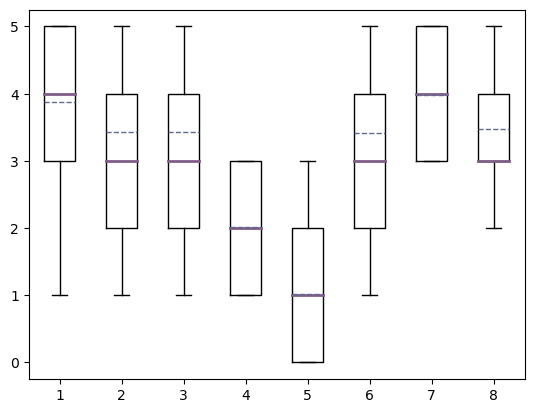

In [458]:
plt.boxplot(df_performance.iloc[:,3:],showmeans = True, meanline  = True,showcaps = True,medianprops={ "color" : "#805d87","linewidth": 2},
            boxprops={"color":"black","linewidth": 1},whiskerprops={"color": "black", "linewidth": 1},
            capprops={"color": "black", "linewidth": 1},meanprops = {"color": "#5e6b91","linewidth": 1 });

<a id='satis'></a>
#### ***4. Satisfied Level Table:***

In [585]:
df_satisfy= pd.read_csv("HR/SatisfiedLevel.csv")
df_satisfy.head()

,SatisfactionID,SatisfactionLevel
0,1,Very Dissatisfied
1,2,Dissatisfied
2,3,Neutral
3,4,Satisfied
4,5,Very Satisfied


In [587]:
df_satisfy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SatisfactionID     5 non-null      int64 
 1   SatisfactionLevel  5 non-null      object
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


In [589]:
print('The table has a shape of:',df_satisfy.shape)

The table has a shape of: (5, 2)


In [591]:
if df_satisfy.isna().sum().sum()== 0:
    print ('No NULL values in this table')
else:
    print('Total number of Null Values is: ',df_satisfy.isna().sum().sum())

No NULL values in this table


In [593]:
if df_satisfy.duplicated().sum()== 0:
    print ('No DUPLICATED values in this table')
else:
    print('Total number of Duplicated Values is: ',df_satisfy.duplicated().sum())

No DUPLICATED values in this table


In [595]:
print('The number of UNIQUE values in this table:\n\n',df_satisfy.nunique())

The number of UNIQUE values in this table:

 SatisfactionID       5
SatisfactionLevel    5
dtype: int64


In [599]:
print('"SatisfactionID" Categories:\n',df_satisfy.SatisfactionID.unique())
print('\n"SatisfactionLevel" Categories:\n',df_satisfy.SatisfactionLevel.unique())

"SatisfactionID" Categories:
 [1 2 3 4 5]

"SatisfactionLevel" Categories:
 ['Very Dissatisfied' 'Dissatisfied' 'Neutral' 'Satisfied '
 'Very Satisfied']


<a id='rating'></a>
#### ***5. Rating Level Table:***

In [601]:
df_rating= pd.read_csv("HR/RatingLevel.csv")
df_rating.head()

,RatingID,RatingLevel
0,1,Unacceptable
1,2,Needs Improvement
2,3,Meets Expectation
3,4,Exceeds Expectation
4,5,Above and Beyond


In [603]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   RatingID     5 non-null      int64 
 1   RatingLevel  5 non-null      object
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


In [605]:
print('The table has a shape of:',df_rating.shape)

The table has a shape of: (5, 2)


In [607]:
if df_rating.isna().sum().sum()== 0:
    print ('No NULL values in this table')
else:
    print('Total number of Null Values is: ',df_rating.isna().sum().sum())

No NULL values in this table


In [609]:
if df_rating.duplicated().sum()== 0:
    print ('No DUPLICATED values in this table')
else:
    print('Total number of Duplicated Values is: ',df_rating.duplicated().sum())

No DUPLICATED values in this table


In [613]:
print('The number of UNIQUE values in this table:\n\n',df_rating.nunique())

The number of UNIQUE values in this table:

 RatingID       5
RatingLevel    5
dtype: int64


In [615]:
print('"RatingID" Categories:\n',df_rating.RatingID.unique())
print('\n"RatingLevel" Categories:\n',df_rating.RatingLevel.unique())

"RatingID" Categories:
 [1 2 3 4 5]

"RatingLevel" Categories:
 ['Unacceptable' 'Needs Improvement' 'Meets Expectation'
 'Exceeds Expectation ' 'Above and Beyond']


<a id='clean'></a>
## Data Cleaning:

<a id='c_emp'></a>
#### ***1. Employee Table:***

In [617]:
df_emp.head()

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,Divorced,102059,1,No,2012-01-03,No,10,4,9,7
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,CA,White,...,Single,157718,0,Yes,2012-01-04,No,10,6,10,0
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,CA,Asian or Asian American,...,Married,309964,1,No,2012-01-04,No,10,6,10,8
3,47A0-559B,Ermentrude,Berrie,Non-Binary,39,Some Travel,Technology,12,IL,White,...,Married,293132,0,No,2012-01-05,No,10,10,10,0
4,42CC-040A,Stace,Savege,Female,29,Some Travel,Human Resources,29,CA,White,...,Single,49606,0,No,2012-01-05,Yes,6,1,1,6


##### _1. Renaming Columns to be handled easily as follows:_
- EmployeeID to ***Emp_ID***
- FirstName to ***F_Name***
- LastName to ***L_Name***
- BusinessTravel to ***Business_Travel***
- DistanceFromHome (KM) to ***Comute_Distance***
- Ethnicity to ***Race***
- Education to ***Edu_level_ID***
- EducationField to ***Major***
- JobRole to ***Position***
- MaritalStatus to ***Marital_Status***
- StockOptionLevel to ***Equity_Grant***
- OverTime to ***Overtime***
- HireDate to ***Hire_Date***
- Attrition to ***Turnover***
- YearsAtCompany to  ***Tenure***
- YearsInMostRecentRole to ***Role_Tenure***
- YearsSinceLastPromotion to ***Promotion_Gap***
- YearsWithCurrManager to ***Manager_Tenure***

In [671]:
# Renaming the dataset columns:
df_emp = df_emp.rename(columns = {"EmployeeID":"Emp_ID", "FirstName":"F_Name", 'LastName':"L_Name","BusinessTravel":"Business_Travel",
                                  "DistanceFromHome (KM)":"Comute_Distance","Ethnicity":"Race", "Education":"Edu_level_ID", "EducationField":"Major",
                                  "JobRole":"Position", "MaritalStatus":"Marital_Status", "StockOptionLevel":"Equity_Grant","OverTime":"Overtime", 
                                  "HireDate":"Hire_Date","Attrition":"Turnover", "YearsAtCompany":"Tenure", "YearsInMostRecentRole": "Role_Tenure",
                                  "YearsSinceLastPromotion":"Promotion_Gap", "YearsWithCurrManager":"Manager_Tenure"})
df_emp.head(1)

,Emp_ID,F_Name,L_Name,Gender,Age,Business_Travel,Department,Comute_Distance,State,Race,...,Marital_Status,Salary,Equity_Grant,Overtime,Hire_Date,Turnover,Tenure,Role_Tenure,Promotion_Gap,Manager_Tenure
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,Divorced,102059,1,No,2012-01-03,No,10,4,9,7


#### _2. Changing the Hire date to Date Data Type:_

In [688]:
df_emp['Hire_Date'] = pd.to_datetime(df_emp['Hire_Date']).dt.date
df_emp.Hire_Date.head()

0    2012-01-03
1    2012-01-04
2    2012-01-04
3    2012-01-05
4    2012-01-05
Name: Hire_Date, dtype: object

#### _3. Handling the extra space & incorrect spelling in the following:_
- ***Business_Travel*** column: Editing _"No Travel "_, _"Frequent Traveller"_ values.
- ***Race*** column: Editing _'Other '_ value.
- ***Major*** column: Editing _'Marketing '_ value.


In [725]:
# 1- Business_Travel Column:
df_emp.Business_Travel= np.where(df_emp.Business_Travel== "No Travel ","No Travel",df_emp.Business_Travel)
df_emp.Business_Travel= np.where(df_emp.Business_Travel== "Frequent Traveller","Frequent Traveler",df_emp.Business_Travel)
print('The updated "Business_Travel" Categories are as follows:\n\n   ',df_emp.Business_Travel.unique())

The updated "Business_Travel" Categories are as follows:

    ['Some Travel' 'No Travel' 'Frequent Traveler']


In [727]:
# 2- Race Column:
df_emp.Race= np.where(df_emp.Race== 'Other ','Other',df_emp.Race)
print('The updated "Race" Categories are as follows:\n\n',df_emp.Race.unique())

The updated "Race" Categories are as follows:

 ['White' 'Asian or Asian American' 'Mixed or multiple ethnic groups'
 'Black or African American' 'Native Hawaiian ' 'Other'
 'American Indian or Alaska Native']


In [729]:
# 3- Major Column:
df_emp.Major= np.where(df_emp.Major== 'Marketing ','Marketing',df_emp.Major)
print('The updated "Major" Categories are as follows:\n\n',df_emp.Major.unique())

The updated "Major" Categories are as follows:

 ['Marketing' 'Computer Science' 'Technical Degree' 'Information Systems'
 'Other' 'Economics' 'Human Resources' 'Business Studies']


#### _4. Arranging columns:_

In [734]:
df_emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Emp_ID           1470 non-null   object
 1   F_Name           1470 non-null   object
 2   L_Name           1470 non-null   object
 3   Gender           1470 non-null   object
 4   Age              1470 non-null   int64 
 5   Business_Travel  1470 non-null   object
 6   Department       1470 non-null   object
 7   Comute_Distance  1470 non-null   int64 
 8   State            1470 non-null   object
 9   Race             1470 non-null   object
 10  Edu_level_ID     1470 non-null   int64 
 11  Major            1470 non-null   object
 12  Position         1470 non-null   object
 13  Marital_Status   1470 non-null   object
 14  Salary           1470 non-null   int64 
 15  Equity_Grant     1470 non-null   int64 
 16  Overtime         1470 non-null   object
 17  Hire_Date        1470 non-null   

In [786]:
# relocating the "age_stages" column to be in the 6th column:
df_emp.insert(5,'Race',df_emp.pop('Race'))
df_emp.insert(6,'Marital_Status',df_emp.pop('Marital_Status'))
df_emp.insert(7,'Edu_level_ID',df_emp.pop('Edu_level_ID'))
df_emp.insert(8,'Major',df_emp.pop('Major'))
df_emp.insert(9,'State',df_emp.pop('State'))
df_emp.insert(10,'Comute_Distance',df_emp.pop('Comute_Distance'))
df_emp.insert(11,'Position',df_emp.pop('Position'))
df_emp.insert(12,'Department',df_emp.pop('Department'))
df_emp.insert(13,'Salary',df_emp.pop('Salary'))
df_emp.insert(14,'Hire_Date',df_emp.pop('Hire_Date'))
df_emp.insert(15,'Tenure',df_emp.pop('Tenure'))
df_emp.insert(16,'Role_Tenure',df_emp.pop('Role_Tenure'))
df_emp.insert(17,'Promotion_Gap',df_emp.pop('Promotion_Gap'))
df_emp.insert(18,'Manager_Tenure',df_emp.pop('Manager_Tenure'))
df_emp.insert(19,'Overtime',df_emp.pop('Overtime'))

In [788]:
df_emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Emp_ID           1470 non-null   object
 1   F_Name           1470 non-null   object
 2   L_Name           1470 non-null   object
 3   Gender           1470 non-null   object
 4   Age              1470 non-null   int64 
 5   Race             1470 non-null   object
 6   Marital_Status   1470 non-null   object
 7   Edu_level_ID     1470 non-null   int64 
 8   Major            1470 non-null   object
 9   State            1470 non-null   object
 10  Comute_Distance  1470 non-null   int64 
 11  Position         1470 non-null   object
 12  Department       1470 non-null   object
 13  Salary           1470 non-null   int64 
 14  Hire_Date        1470 non-null   object
 15  Tenure           1470 non-null   int64 
 16  Role_Tenure      1470 non-null   int64 
 17  Promotion_Gap    1470 non-null   

<a id='c_edu'></a>
#### ***2. Educational Level Table:***

<a id='c_perform'></a>
#### ***3. Performance Rating Table:***

In [471]:
#df_performance['ReviewDate'] = pd.to_datetime(df_performance['ReviewDate']).dt.date

<a id='c_satis'></a>
#### ***4. Satisfied Level Table:***

<a id='c_rating'></a>
#### ***5. Rating Table:***

In [281]:
# Define the connection parameters
server = 'HEND\SQLEXPRESS'  # SQL Server name or IP
database_name = 'Test'  # Name of the new database

# Establish a connection to the SQL Server using Windows Authentication and enabling autocommit
driver = 'ODBC Driver 17 for SQL Server'
connection_string = f'DRIVER={driver};SERVER={server};Trusted_Connection=yes;'
connection = pyodbc.connect(connection_string, autocommit=True)  # Enable autocommit

# Create a new cursor
cursor = connection.cursor()

# SQL command to create a new database
create_db_query = f"CREATE DATABASE {database_name}"

try:
    # Execute the SQL command
    cursor.execute(create_db_query)
    print(f"Database '{database_name}' created successfully.")
except:
    print("The database is already created")

# Close the cursor and connection
cursor.close()
connection.close()

Database 'Test' created successfully.


In [273]:
connect_db= f'mssql://@{server}/{database_name}?driver={driver}'
engine = create_engine(connect_db)
con_db= engine.connect()

In [275]:
df_performance.to_sql('performance', engine, index=False)

-1

In [277]:
df_satisfy.to_sql('satisfaction', engine, index=False)

-1

In [279]:
df_rating.to_sql('rating', engine, index=False)

-1